In [1]:
# import required libraries
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

# Part 1 ‑ Exploratory data analysis
### 1.1 The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. 

In [2]:
# load the json file into a dataframe
with open('logins.json') as f:
    data = json.load(f) 

logins = pd.DataFrame(data)
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [3]:
logins.describe()

,login_time
count,93142
unique,92265
top,1970-03-14 17:45:52
freq,3


In [4]:
# convert the login_time to datetime format and sort the values in ascending order
logins['login_time'] = pd.to_datetime(logins['login_time'],format="%Y-%m-%d")

logins = logins.sort_values('login_time')

logins.head()

,login_time
6,1970-01-01 20:12:16
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
3,1970-01-01 20:16:36
2,1970-01-01 20:16:37


In [5]:
# check the earliest and latest login_time
logins['login_time'].min(), logins['login_time'].max()

(Timestamp('1970-01-01 20:12:16'), Timestamp('1970-04-13 18:57:38'))

### 1.2 Aggregate these login counts based on 15minute time intervals and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. 

In [6]:
# set index to login_time and resample the dataframe using 15min intervals
logins['count']=1
logins = logins.set_index('login_time')
logins = logins.resample('15T').sum()
logins.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


Text(0, 0.5, 'Count')

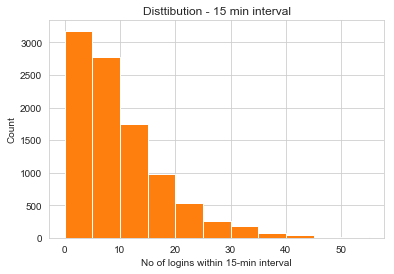

In [7]:
# plot a histogram to show counts of logins within 15-min intervals
logins['count'].plot(kind='hist',bins=np.arange(0,60,5),color='C1',title='Disttibution - 15 min interval')
plt.xlabel('No of logins within 15-min interval')
plt.ylabel('Count')

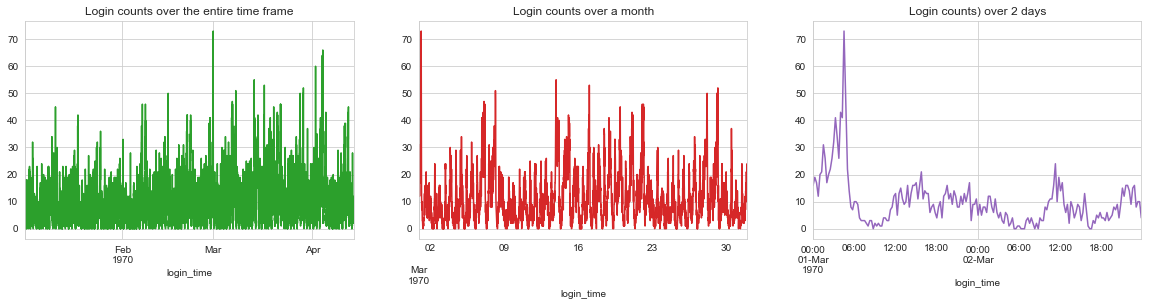

In [8]:
# plot the login counts over various timespans 
plt.figure(figsize=(20,4));
ax1 = plt.subplot(1,3,1)
logins.plot(ax=ax1,color='C2',title='Login counts over the entire time frame',legend=False);
ax2 = plt.subplot(1,3,2)
logins['1970-03'].plot(ax=ax2,color='C3',title='Login counts over a month',legend=False);
ax3 = plt.subplot(1,3,3)
logins['1970-03-01':'1970-03-02'].plot(ax=ax3,color='C4', title='Login counts) over 2 days',legend=False);

### 1.3 Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

# Part 2 ‑ Experiment and metrics design
### The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities. However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

### 2.1 What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

#### If the driver partners of each city begin to spend more time in the other city, it would be a key measure of success of this experiment. This will an good measure to ensure that there are no driver partners exclusive to any one city.

### 2.2 Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
### a) how you will implement the experiment

#### Split the driver partners into 2 groups. Split each group again into test and holdout driver partners. Offer the toll reimbursement to test group only. At the end of the experiment, check to see if the test group spent more or equal amount of time in both cities.

### b) what statistical test(s) you will conduct to verify the significance of the observation

#### An A/B test would be most ideal statistical test to verify the significance of the observation

### c) how you would interpret the results and provide recommendations to the city operations team along with any caveats.

#### Compute the p-value and use it for interpreting results. 

# Part 3 ‑ Predictive modeling
### Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days. We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate. The data is in the attached file ultimate_data_challenge.json.

In [9]:
# load the json files into a dataframe
with open('ultimate_data_challenge.json') as f:
    data = json.load(f) 

riders = pd.DataFrame(data)
riders.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [10]:
riders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


#### From the above, we can see that the avg_rating_by_driver, avg_rating_of_driver and phone columns seems to have some missing values

### Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?

In [11]:
# convert the date fields into datetime format
riders['last_trip_date'] = pd.to_datetime(riders['last_trip_date'],format="%Y-%m-%d")
riders['signup_date'] = pd.to_datetime(riders['signup_date'],format="%Y-%m-%d")

In [12]:
riders.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


In [13]:
# find the first and last signup dates
riders['signup_date'].min(), riders['signup_date'].max()

(Timestamp('2014-01-01 00:00:00'), Timestamp('2014-01-31 00:00:00'))

In [14]:
# find the first and last trip dates
riders['last_trip_date'].min(), riders['last_trip_date'].max()

(Timestamp('2014-01-01 00:00:00'), Timestamp('2014-07-01 00:00:00'))

In [15]:
# the user is considered "retained" if they were active up until a month ago so find that cutoff date
amonthago = riders['last_trip_date'].max() - pd.Timedelta('30 days')
amonthago

Timestamp('2014-06-01 00:00:00')

In [16]:
# create a new column retained and populate with True or False values if last_trip_date >= cutoff_date
riders['retained'] = riders['last_trip_date'].apply(lambda x: True if x>=amonthago else False)

In [17]:
# calculate the % of riders retained
riders['retained'].sum()/len(riders)

0.37608

#### 37.6% of observed users were retained

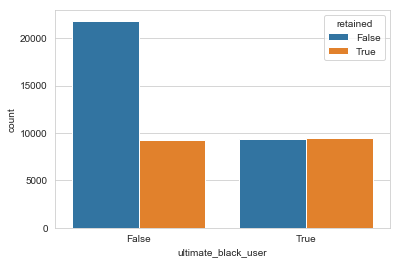

In [18]:
# plot the correlation between ultimate_black_user and no of retained riders
sns.countplot(x='ultimate_black_user',data=riders,hue='retained')

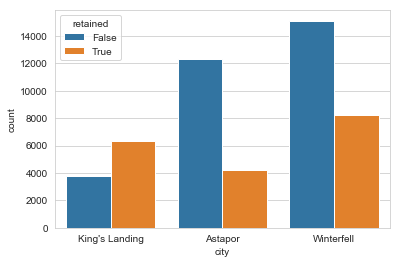

In [19]:
# plot the correlation between city and no of retained riders
sns.countplot(x='city',data=riders,hue='retained')

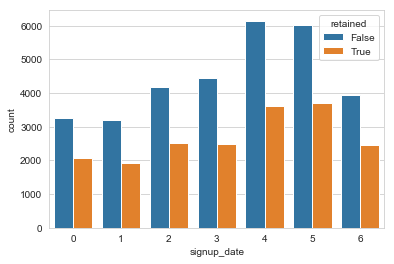

In [20]:
# plot the correlation between signup_date and no of retained riders
sns.countplot(x=riders['signup_date'].dt.dayofweek,data=riders,hue='retained')

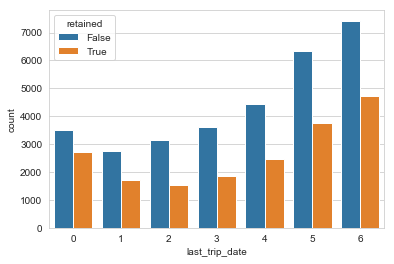

In [21]:
# plot the correlation between DOW of last_trip_date and no of retained riders
sns.countplot(x=riders['last_trip_date'].dt.dayofweek,data=riders,hue='retained')

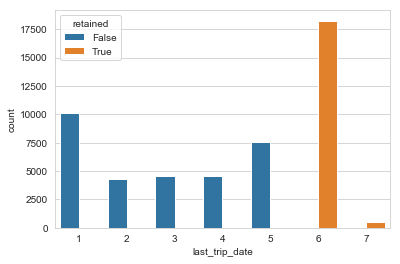

In [22]:
# plot the correlation between month of last_trip_date and no of retained riders
sns.countplot(x=riders['last_trip_date'].dt.month,data=riders,hue='retained')

### Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.

In [23]:
# impute missing values
riders['avg_rating_of_driver']=riders['avg_rating_of_driver'].fillna(riders['avg_rating_of_driver'].median())
riders['avg_rating_by_driver']=riders['avg_rating_by_driver'].fillna(riders['avg_rating_by_driver'].median())

In [24]:
# convert signup_date into quantified variable and drop the date columns
riders['signup_week'] = riders.signup_date.dt.week.astype('category')
riders = riders.drop('signup_date',axis=1)
riders = riders.drop('last_trip_date',axis=1)

In [25]:
# convert boolean to int
riders['ultimate_black_user'] = (riders['ultimate_black_user'] == 'TRUE').astype(int)

In [26]:
# import utilities for modeling
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor

In [27]:
# identify independent features X and target variable y
X = pd.get_dummies(riders.drop('retained',axis=1), drop_first=True)
y = riders['retained']

X.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,city_King's Landing,city_Winterfell,phone_iPhone,signup_week_2,signup_week_3,signup_week_4,signup_week_5
0,3.67,5.0,4.7,1.10,15.4,4,0,46.2,1,0,1,0,0,1,0
1,8.26,5.0,5.0,1.00,0.0,0,0,50.0,0,0,0,0,0,0,1
2,0.77,5.0,4.3,1.00,0.0,3,0,100.0,0,0,1,1,0,0,0
3,2.36,4.9,4.6,1.14,20.0,9,0,80.0,1,0,1,1,0,0,0
4,3.13,4.9,4.4,1.19,11.8,14,0,82.4,0,1,0,0,0,0,1


In [28]:
# split the training and test data
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=30, stratify=y, test_size=0.30)

In [29]:
# initiate the score table
index = ['LogisticRegression','RandomForestClassifier']
score_table = pd.DataFrame(index = index, columns= ['accuracy_train','f1_score_train','accuracy_test','f1_score_test'])

In [30]:
# Apply the Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100, min_samples_leaf=10, random_state=1)
rfc.fit(X_train, y_train)
predictions = rfc.predict(X_test)

print("RandomForestClassifier Accuracy = ",metrics.accuracy_score(y_test, predictions))
print("Classification Report:\n", metrics.classification_report(y_test, predictions))
print("Confusion Matrix:\n", metrics.confusion_matrix(y_test, predictions))

RandomForestClassifier Accuracy =  0.7698666666666667
Classification Report:
               precision    recall  f1-score   support

       False       0.79      0.86      0.82      9359
        True       0.73      0.62      0.67      5641

   micro avg       0.77      0.77      0.77     15000
   macro avg       0.76      0.74      0.75     15000
weighted avg       0.77      0.77      0.77     15000

Confusion Matrix:
 [[8029 1330]
 [2122 3519]]


In [31]:
# Apply the Gradient Boosting Classifier
gbc = GradientBoostingClassifier(n_estimators=100, min_samples_leaf=10, random_state=1)
gbc.fit(X_train, y_train)
predictions = gbc.predict(X_test)

print("GradientBoostingClassifier Accuracy = ",metrics.accuracy_score(y_test, predictions))
print("Classification Report:\n", metrics.classification_report(y_test, predictions))
print("Confusion Matrix:\n", metrics.confusion_matrix(y_test, predictions))

GradientBoostingClassifier Accuracy =  0.7728
Classification Report:
               precision    recall  f1-score   support

       False       0.80      0.85      0.82      9359
        True       0.72      0.64      0.68      5641

   micro avg       0.77      0.77      0.77     15000
   macro avg       0.76      0.75      0.75     15000
weighted avg       0.77      0.77      0.77     15000

Confusion Matrix:
 [[7968 1391]
 [2017 3624]]


In [32]:
# Apply the Logistic Regression
lgr = LogisticRegression(random_state=1)
lgr.fit(X_train, y_train)
predictions = lgr.predict(X_test)

print("LogisticRegression Accuracy = ",metrics.accuracy_score(y_test, predictions))
print("Classification Report:\n", metrics.classification_report(y_test, predictions))
print("Confusion Matrix:\n", metrics.confusion_matrix(y_test, predictions))

LogisticRegression Accuracy =  0.7035333333333333
Classification Report:
               precision    recall  f1-score   support

       False       0.71      0.88      0.79      9359
        True       0.67      0.42      0.51      5641

   micro avg       0.70      0.70      0.70     15000
   macro avg       0.69      0.65      0.65     15000
weighted avg       0.70      0.70      0.68     15000

Confusion Matrix:
 [[8209 1150]
 [3297 2344]]


#### So it is evident from the above modeling methods that Gradient Boosting classifier will give the best performance and accuracy

### Briefly discuss how Ultimate might leverage the insights gained from the model to improve its longterm rider retention (again, a few sentences will suffice).

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   14.8s finished


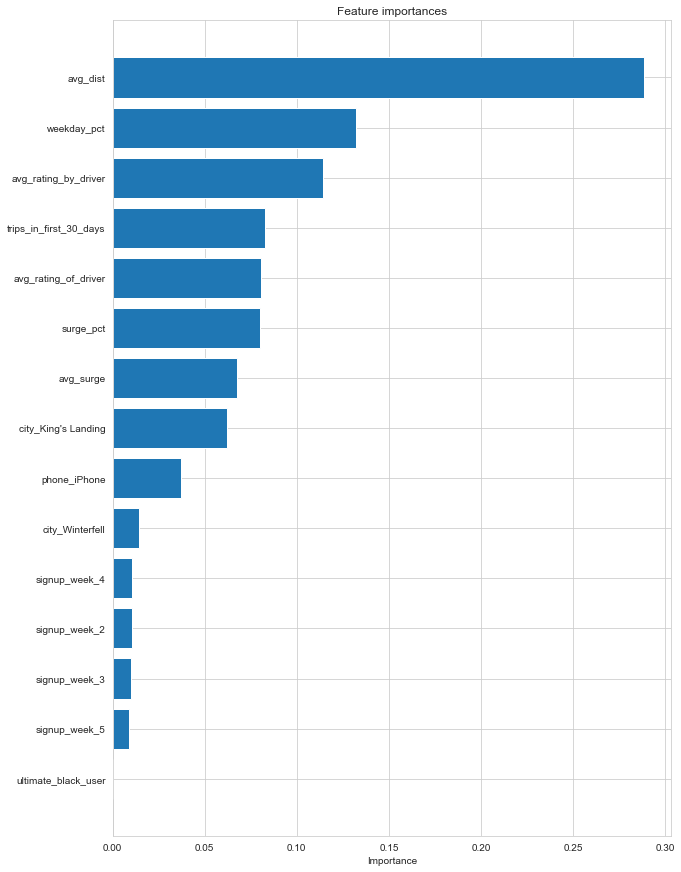

In [34]:
RF = RandomForestRegressor(verbose=True, n_estimators=500, max_features='sqrt')
RF.fit(X, y)

features_list = X.columns.values
feature_importance = RF.feature_importances_
sorted_idx = np.argsort(feature_importance)
 
plt.figure(figsize=(10,15))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importances')
plt.draw()
plt.show()

#### From the above visualization, it appears that King's Landing has a higher user retention rate than other 2 cities. avg_dist and weekday_pct are the top 2 important features in determining the user retention after 6 months of signig up.